Here we did LDA and PCA using sklearn library to compare with out own method

In [13]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import mquantiles
from scipy.spatial.distance import cdist
from LDA import LDA
import seaborn as sns

In [2]:
data_train = np.load('data/fashion_test.npy', mmap_mode='r')
data_test = np.load('data/fashion_train.npy', mmap_mode='r')

In [3]:
X_train = data_train[:, :-1]
y_train = data_train[:, -1]


In [7]:
clf = LinearDiscriminantAnalysis(n_components=4)
clf.fit(X_train, y_train)
LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [8]:
lda_transformed_X_train= clf.fit_transform(X_train, y_train)

In [14]:
# Transform data
transformed_X_train= clf.transform(X_train)

# Transform to pandas data frame
d = {'LDA1': transformed_X_train[:,0], 'LDA2': lda_transformed_X_train[:,2], 'LDA3': lda_transformed_X_train[:,2], 'LDA4': lda_transformed_X_train[:,3]}
lda_transformed_X_train = pd.DataFrame(d)

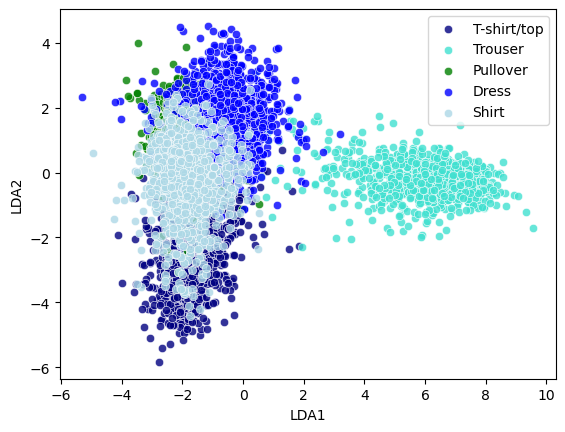

In [16]:
fig, ax = plt.subplots()

colors = colors = ["navy", "turquoise", "green", 'blue', 'lightblue']
components = ['LDA1', 'LDA2', 'LDA3', 'LDA4']
class_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}

for k, c in enumerate(colors):
    sns.scatterplot(data=lda_transformed_X_train[y_train == k], x='LDA1', y='LDA2', alpha=0.8, color=c, label=class_dict[k], ax=ax)

plt.savefig('lda_sklearn_plot.png')

In [101]:
pca = PCA(n_components=2)
pca.fit(X_train)
PCA(n_components=2)


PCA(n_components=2)

In [102]:
pca_transformed_X_train= pca.fit_transform(X_train, y=None)
pca_transformed_X_train

array([[-1096.77124467,  -298.52782042],
       [ 1535.5015589 ,  -954.88358909],
       [ -692.707419  , -1020.04189623],
       ...,
       [ 1581.05144219,   719.00048257],
       [ 1427.36111878,   -91.33143444],
       [  523.95125538,   830.65896892]])

In [91]:
from sklearn.decomposition import PCA

# Assuming X_train is your feature matrix
pca = PCA(n_components=100)
pca_transformed_X_train_2 = pca.fit_transform(X_train)

# Access PC1 and PC2
pc1, pc2 = pca.components_[:2]

print("PC1:", pc1.shape)
print("PC2:", pc2.shape)


PC1: (784,)
PC2: (784,)


In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  


In [ ]:
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

In [ ]:
print(pca.explained_variance_) 


Text(0, 0.5, 'explained variance ratio')

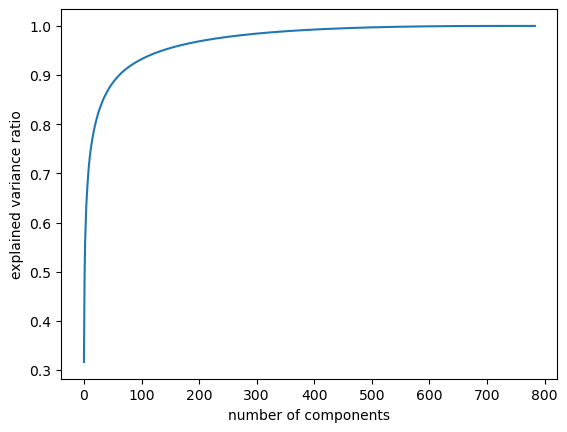

In [92]:
from sklearn.decomposition import PCA

my_model = PCA(n_components=784)
my_model.fit_transform(X_train)

explained_var_pca = my_model.explained_variance_ratio_.cumsum()
#print(my_model.explained_variance_)
#print(my_model.explained_variance_ratio_)
#print(my_model.explained_variance_ratio_.cumsum())

plt.plot(explained_var_pca)
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')


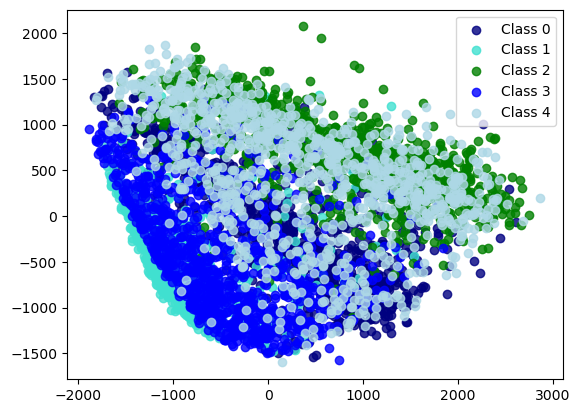

In [75]:


plt.figure()

colors = ["navy", "turquoise", "green", 'blue', 'lightblue'],
colors = ["navy", "turquoise", "green", 'blue', 'lightblue']
lw = 2

for color, i in zip(colors, [0, 1, 2, 3, 4]):
    plt.scatter(
        pca_transformed_X_train[y_train == i, 0], pca_transformed_X_train[y_train == i, 1], alpha=0.8, color=color, label=f'Class {i}'
    )
# Plotting x-axis (y=0 line)
#plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Plotting y-axis (x=0 line)
#plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.title("PCA on clothing dataset")
plt.savefig("pca_plot.png")
plt.show()


In [76]:
# Perform PCA
pca = PCA(n_components=100)
pca_transformed_X_train = pca.fit_transform(X_train[y_train==1])

In [77]:
pca_transformed_X_train.shape

(1000, 100)

In [53]:
# from scipy.stats.mstats import mquantiles


# # Set limits for x and y axes
# xlim = (-1000, 1000)
# ylim = (-1000, 1000)

# # Scatter plot of PC1 vs PC2 
# plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1]) #c=y_train[]

# # Calculate marginal quantiles for PC1 and PC2 
# quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
# quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

# # Plotting quantiles on the sides of the scatter plot
# plt.axhline(quantiles_pc1[0], color='red', linestyle='--', linewidth=1, label='PC1 Q1')
# plt.axhline(quantiles_pc1[1], color='blue', linestyle='--', linewidth=1, label='PC1 Q2 (Median)')
# plt.axhline(quantiles_pc1[2], color='green', linestyle='--', linewidth=1, label='PC1 Q3')


# plt.axvline(quantiles_pc2[0], color='orange', linestyle='--', linewidth=1, label='PC2 Q1')
# plt.axvline(quantiles_pc2[1], color='purple', linestyle='--', linewidth=1, label='PC2 Q2 (Median)')
# plt.axvline(quantiles_pc2[2], color='brown', linestyle='--', linewidth=1, label='PC2 Q3')

# # Set limits for x and y axes
# plt.xlim(xlim)
# plt.ylim(ylim)

# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('PCA of clothing dataset')
# plt.legend()

# plt.show()


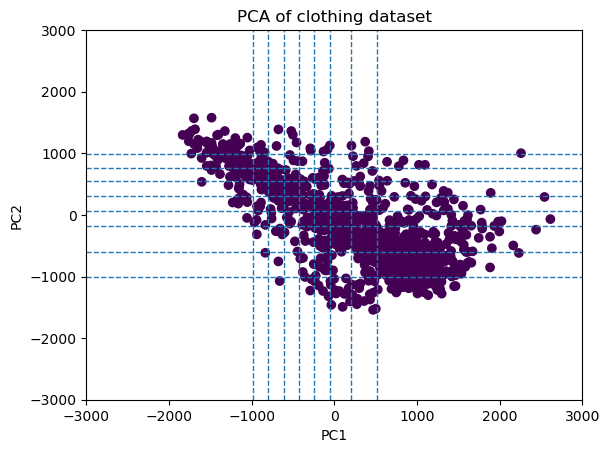

In [95]:

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_train)
pca_transformed_X_train = pca.transform(X_train[y_train == 0])


# Set limits for x and y axes
xlim = (-3000, 3000)
ylim = (-3000, 3000)

# Scatter plot of PC1 vs PC2
plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1], c=y_train[y_train == 0], cmap='viridis')

# Calculate marginal quantiles for PC1 and PC2
quantiles_pc1 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 0] >= xlim[0]) & (pca_transformed_X_train[:, 0] <= xlim[1]), 0], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
quantiles_pc2 = mquantiles(pca_transformed_X_train[(pca_transformed_X_train[:, 1] >= ylim[0]) & (pca_transformed_X_train[:, 1] <= ylim[1]), 1], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

# Plotting quantiles on the sides of the scatter plot
for q in quantiles_pc1:
    plt.axhline(q, linestyle='--', linewidth=1)

for q in quantiles_pc2:
    plt.axvline(q, linestyle='--', linewidth=1)

# Set limits for x and y axes
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of clothing dataset')
plt.show()


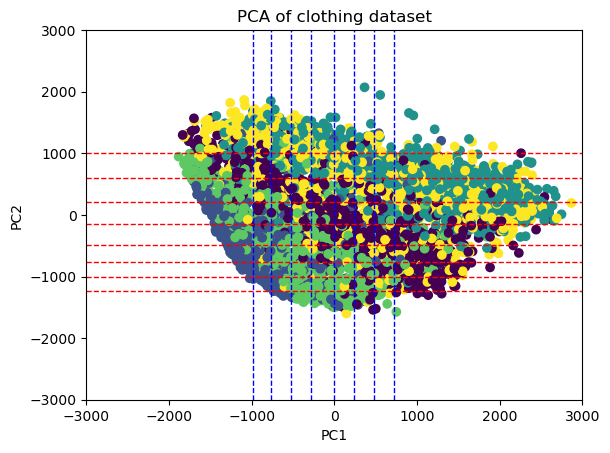

In [96]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_train)
pca_transformed_X_train = pca.transform(X_train)

# Set limits for x and y axes
xlim = (-3000, 3000)
ylim = (-3000, 3000)

# Scatter plot of PC1 vs PC2
plt.scatter(pca_transformed_X_train[:, 0], pca_transformed_X_train[:, 1], c=y_train, cmap='viridis')  # Use the original y_train here

# Calculate marginal quantiles for PC1 and PC2
quantiles_pc1 = mquantiles(pca_transformed_X_train[:, 0], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
quantiles_pc2 = mquantiles(pca_transformed_X_train[:, 1], prob=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

# Plotting quantiles on the sides of the scatter plot
for q in quantiles_pc1:
    plt.axhline(q, linestyle='--', linewidth=1, color='red')  # Adjust the color as needed

for q in quantiles_pc2:
    plt.axvline(q, linestyle='--', linewidth=1, color='blue')  # Adjust the color as needed

# Set limits for x and y axes
plt.xlim(xlim)
plt.ylim(ylim)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of clothing dataset')
plt.show()


In [57]:
pca_transformed_X_train.shape

(5000, 2)

In [58]:
quantiles_pc1

array([-1231.37422035, -1001.84112477,  -770.30380677,  -486.69698972,
        -147.75884963,   207.89122952,   596.50383654,  1012.0649207 ])

In [59]:
quantiles_pc2

array([-984.44349595, -761.16271584, -519.54901289, -283.49819926,
        -10.71834598,  242.75634072,  473.00187309,  725.0915355 ])

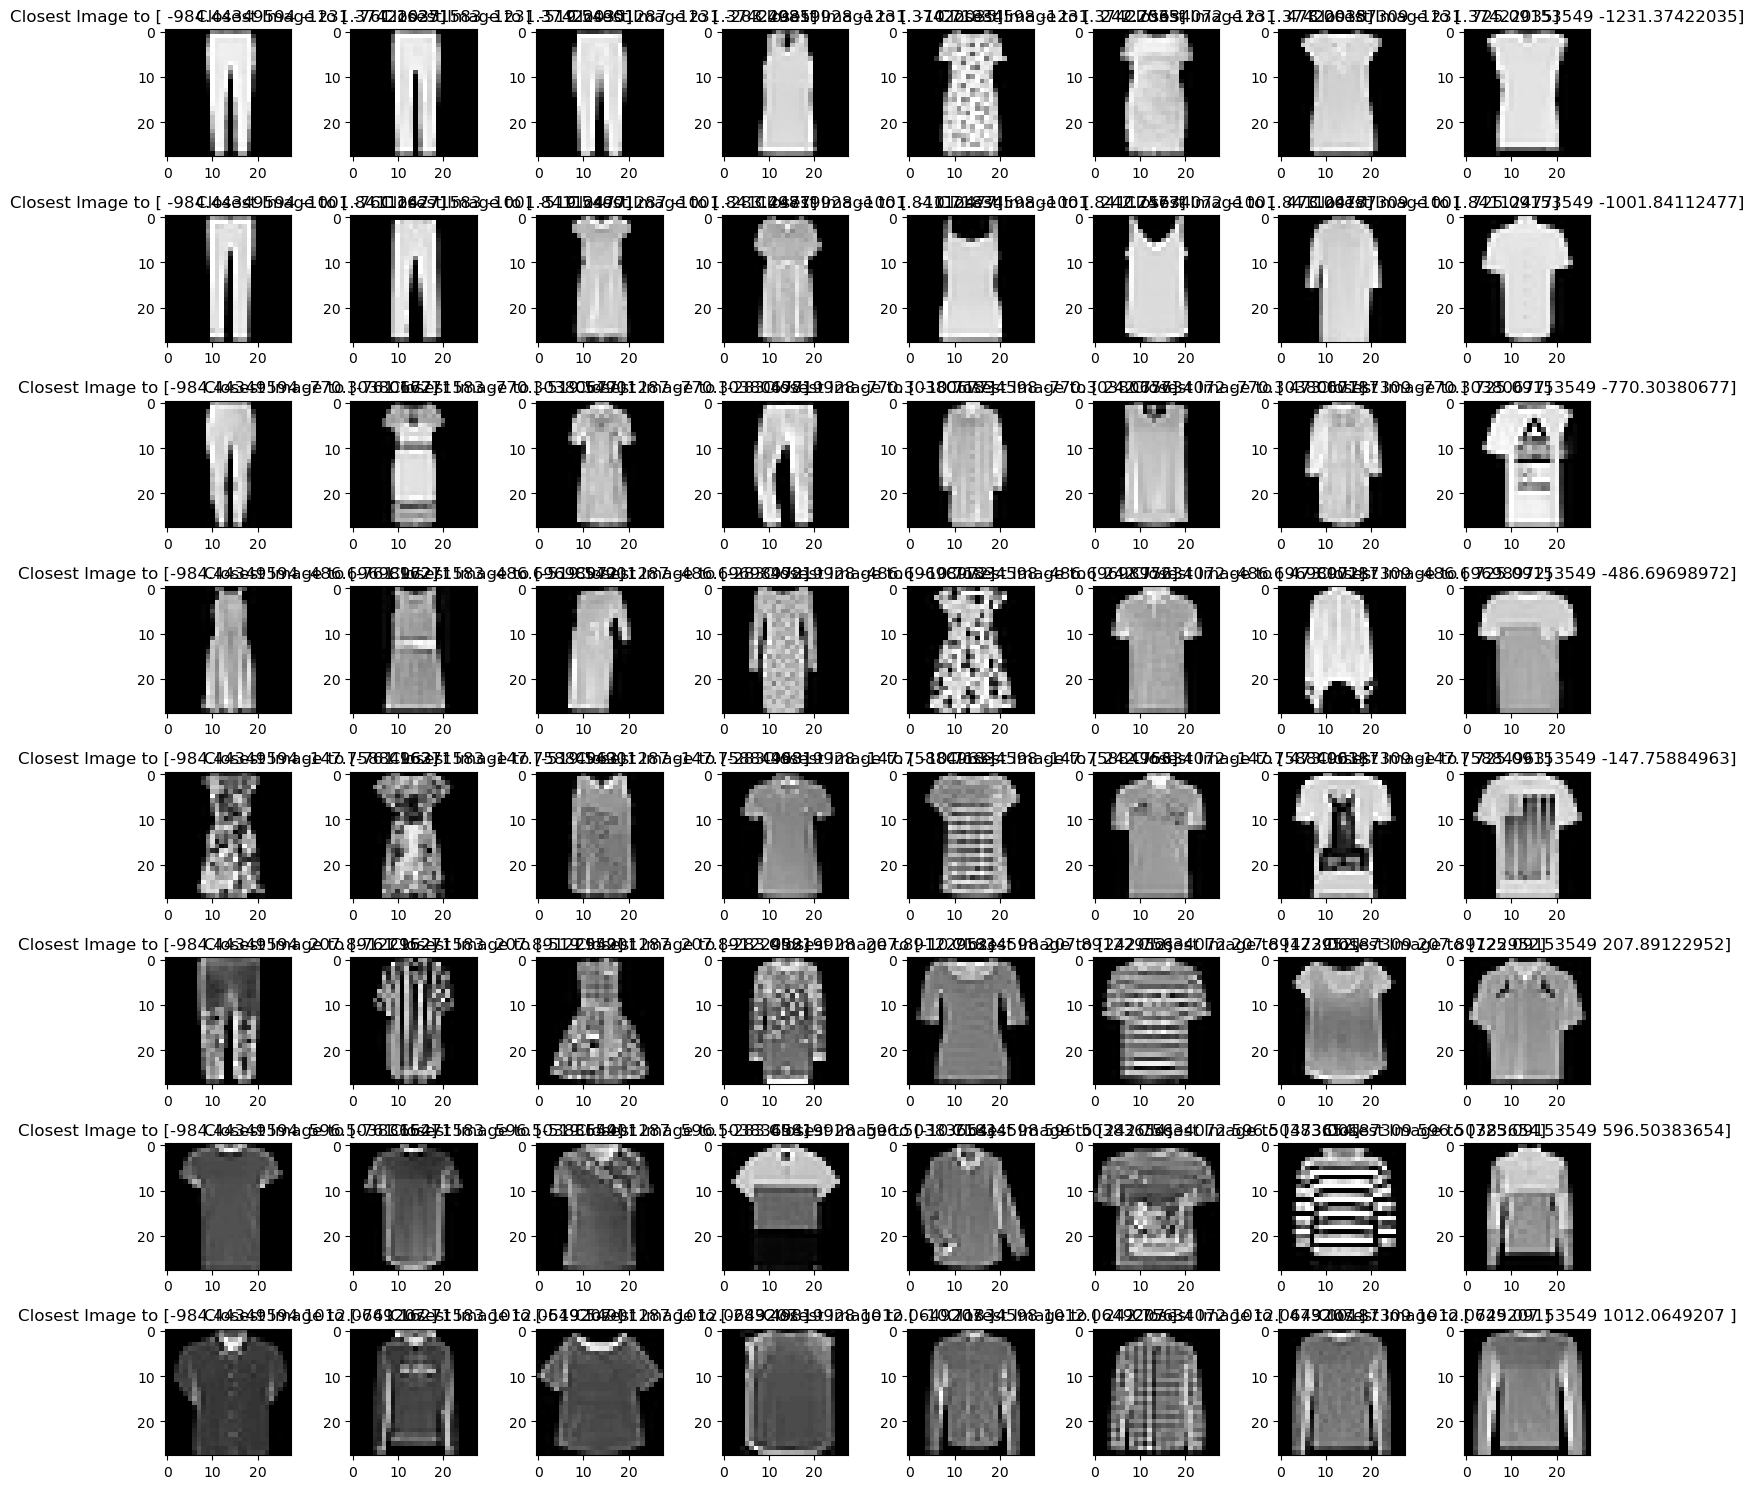

In [108]:
def find_img(pca_X, X, target_coordinates):
    num_images = len(target_coordinates)
    num_cols = len(quantiles_pc2)  # Adjust the number of columns in the grid as needed
    num_rows = -(-num_images // num_cols)  # Ceiling division to determine the number of rows

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

    for i, target_coord in enumerate(target_coordinates):
        # Calculate Euclidean distances
        distances = np.linalg.norm(pca_X - target_coord, axis=1)

        # Find the index of the point with the smallest distance
        closest_point_index = np.argmin(distances)
        closest_image = X[closest_point_index].reshape(28, 28)

        # Determine subplot position
        row_position = i // num_cols
        col_position = i % num_cols

        # Display the image in the subplot
        axes[row_position, col_position].imshow(closest_image, cmap='gray')
        axes[row_position, col_position].set_title(f'Closest Image to {target_coord}')

    # Remove empty subplots
    for i in range(len(target_coordinates), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

num_quantiles_pc1 = len(quantiles_pc1)
num_quantiles_pc2 = len(quantiles_pc2)


target_coordinates = np.array([[quantiles_pc2[j], quantiles_pc1[i]] for i in range(num_quantiles_pc1) for j in range(num_quantiles_pc2)])

#find_img(pca_transformed_X_train, X_train[y_train==1], target_coordinates)
find_img(pca_transformed_X_train, X_train, target_coordinates)



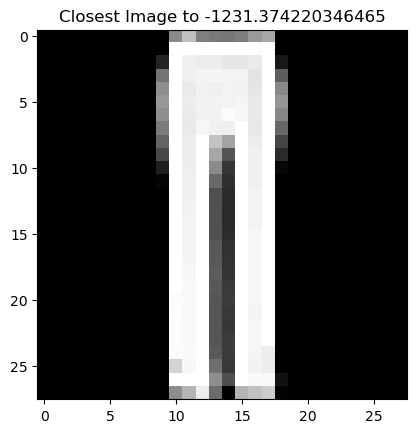

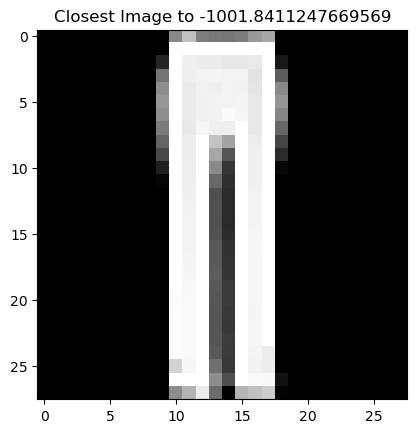

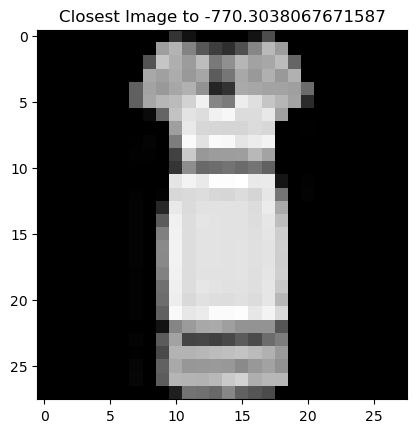

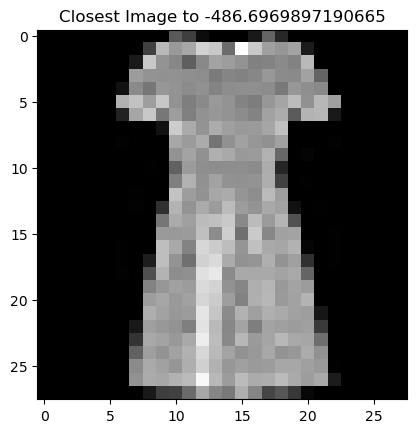

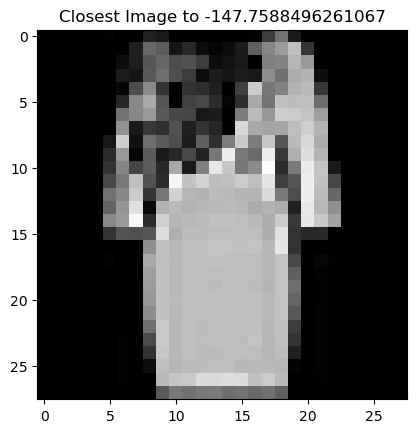

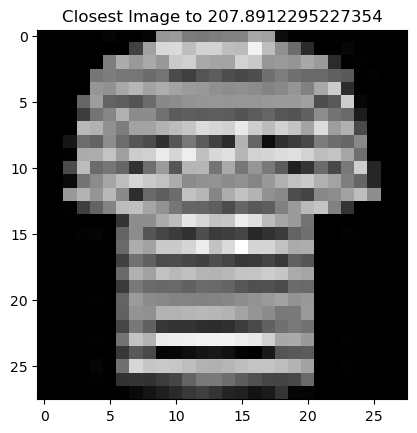

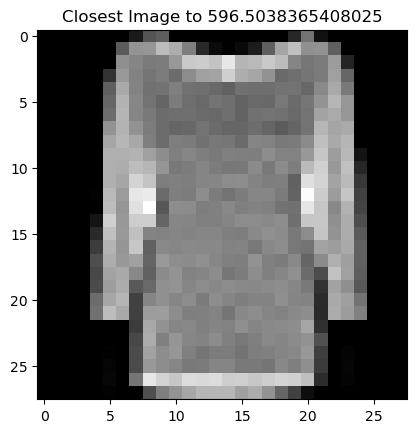

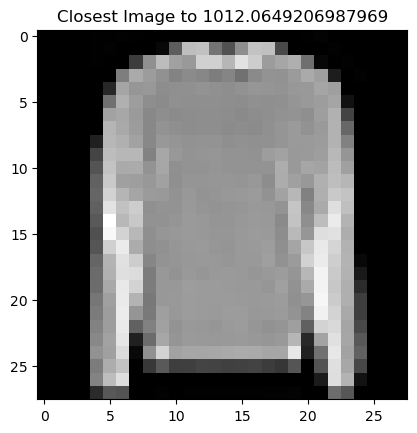

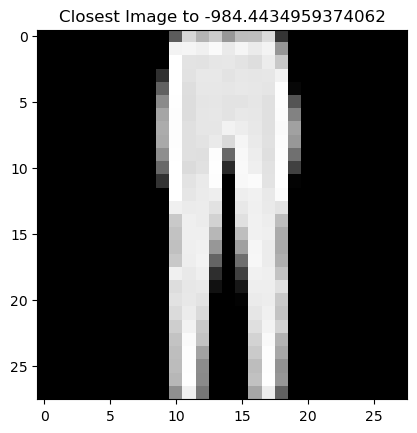

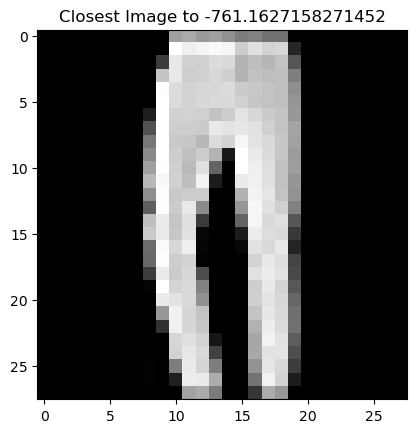

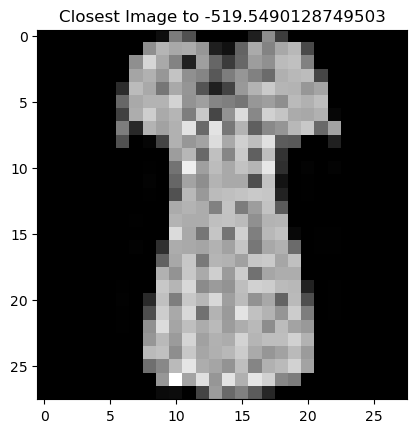

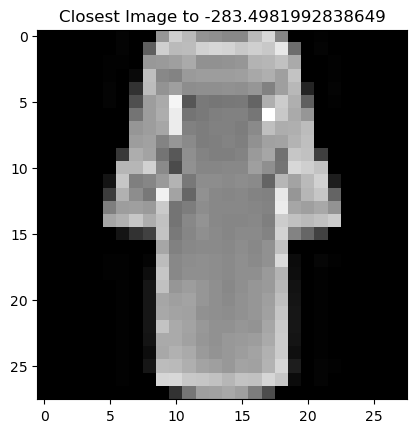

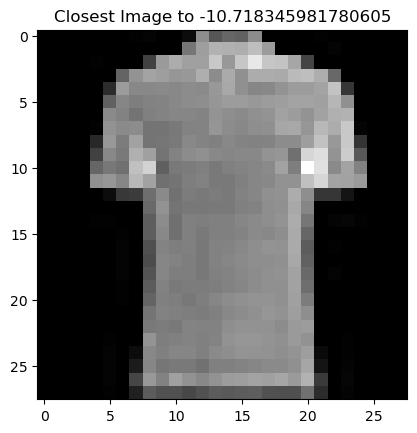

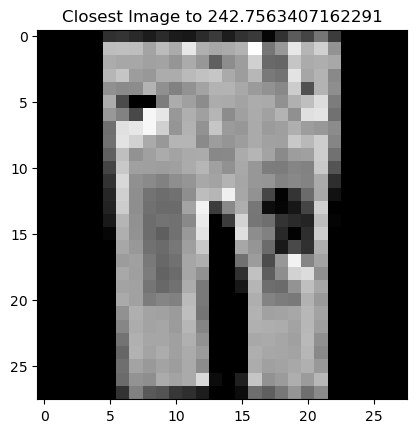

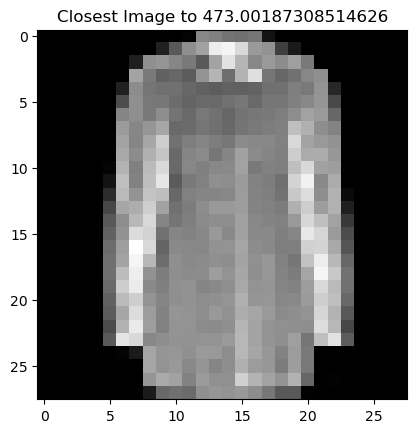

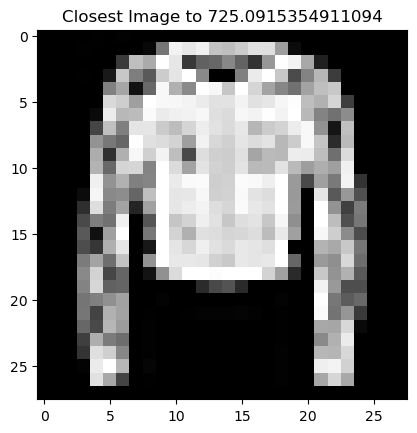

In [106]:
def find_img(X, target_coordinates):
    """finds image from different quantiles in the pca plot"""
    for target_coord in target_coordinates:
        # Calculate Euclidean distances
        distances = np.linalg.norm(X - target_coord, axis=1)

        # Find the index of the point with the smallest distance
        closest_point_index = np.argmin(distances)
        
        closest_image = X_train[closest_point_index].reshape(28, 28)

        # Display the image
        plt.imshow(closest_image, cmap='gray')
        plt.title(f'Closest Image to {target_coord}')
        plt.show()

# Example usage

find_img(pca_transformed_X_train, quantiles_pc1)
find_img(pca_transformed_X_train, quantiles_pc2)
